In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np

In [2]:
def minmax(X):
    if type(X)==pd.DataFrame:
        array_s=MinMaxScaler().fit_transform(X)
        Xs=pd.DataFrame(array_s, index=X.index, columns=X.columns)
        return Xs
    elif type(X)==pd.Series:
        array_s = MinMaxScaler().fit_transform(np.array(X).reshape(-1, 1))
        Xs = pd.Series(np.squeeze(array_s), index=X.index, name=X.name)
        return Xs
    else:
        print('error')
        
c_pca={'PC1': '#911eb4',
 'PC2': '#4363d8',
 'PC3': '#e6194B',
 'PC4': '#3cb44b'}

In [3]:
graz_all = pd.read_csv('../data/graz_all_p3.csv', index_col = 0)

In [4]:
graz_all.index = pd.DatetimeIndex(graz_all.index)
dymo = graz_all.index.to_series().apply(lambda x: x.strftime('%m-%d'))

In [5]:
temporal = ['dayofyear', 'year', 'weekdays_Friday', 'weekdays_Monday',
       'weekdays_Saturday', 'weekdays_Sunday', 'weekdays_Thursday',
       'weekdays_Tuesday', 'weekdays_Wednesday', 'months_Apr', 'months_Aug',
       'months_Dec', 'months_Feb', 'months_Jan', 'months_Jul', 'months_Jun',
       'months_Mar', 'months_May', 'months_Nov', 'months_Oct', 'months_Sep',
       'season_fall', 'season_spring', 'season_summer', 'season_winter']
gases = ['D_NO', 'D_NO2', 'D_PM10', 'N_NO', 'N_NO2', 'N_Ox', 'N_O3', 'N_PM10',
         'O_NO', 'O_NO2', 'O_PM10', 'S_NO', 'S_NO2', 'S_Ox', 'S_O3', 'S_PM10',
          'W_NO', 'W_NO2', 'W_PM10']
other = (set(graz_all.columns).symmetric_difference(set(temporal))).symmetric_difference(gases)

## PCA

In [6]:
graz_all.columns

Index(['O_NO', 'O_NO2', 'O_PM10', 'D_RH', 'D_Temperature', 'D_NO', 'D_NO2',
       'D_PM10', 'N_Pressure_[mbar]', 'N_RH', 'N_Temperature',
       'N_Percipitation', 'N_NO', 'N_NO2', 'N_PM10', 'N_WindSpeed', 'N_WinDir',
       'N_O3', 'W_RH', 'W_Temperature', 'W_NO', 'W_NO2', 'W_PM10',
       'W_WindSpeed', 'W_WinDir', 'S_RH', 'S_Temperature', 'S_NO', 'S_NO2',
       'S_PM10', 'S_WindSpeed', 'S_WinDir', 'S_O3', 'dayofyear', 'year',
       'weekdays_Friday', 'weekdays_Monday', 'weekdays_Saturday',
       'weekdays_Sunday', 'weekdays_Thursday', 'weekdays_Tuesday',
       'weekdays_Wednesday', 'months_Apr', 'months_Aug', 'months_Dec',
       'months_Feb', 'months_Jan', 'months_Jul', 'months_Jun', 'months_Mar',
       'months_May', 'months_Nov', 'months_Oct', 'months_Sep', 'season_fall',
       'season_spring', 'season_summer', 'season_winter', 'S_Ox', 'N_Ox'],
      dtype='object')

In [7]:
pca_t=graz_all[gases].dropna(how='any').select_dtypes(include=float)
pca_t.head(2)

,D_NO,D_NO2,D_PM10,N_NO,N_NO2,N_Ox,N_O3,N_PM10,O_NO,O_NO2,O_PM10,S_NO,S_NO2,S_Ox,S_O3,S_PM10,W_NO,W_NO2,W_PM10
Datum,,,,,,,,,,,,,,,,,,,
2014-01-03,85.29172,48.582783,36.406948,12.906034,28.676586,35.242838,6.566252,22.173819,27.044508,33.078587,33.240788,55.06017,38.592980,43.870122,5.277142,40.209545,28.499367,31.314337,23.542700
2014-01-04,182.96892,64.971920,47.563680,35.579450,42.875824,48.398917,5.523093,21.210737,76.734890,45.691574,35.136900,112.49666,45.415955,48.349478,2.933523,52.475697,72.747480,41.682540,31.892168


### drop NO

In [11]:
pca_t.drop(['D_NO', 'N_NO', 'O_NO', 'S_NO', 'W_NO'], axis=1, inplace=True)
pca_t.head(2)

,D_NO2,D_PM10,N_NO2,N_Ox,N_O3,N_PM10,O_NO2,O_PM10,S_NO2,S_Ox,S_O3,S_PM10,W_NO2,W_PM10
Datum,,,,,,,,,,,,,,
2014-01-03,48.582783,36.406948,28.676586,35.242838,6.566252,22.173819,33.078587,33.240788,38.592980,43.870122,5.277142,40.209545,31.314337,23.542700
2014-01-04,64.971920,47.563680,42.875824,48.398917,5.523093,21.210737,45.691574,35.136900,45.415955,48.349478,2.933523,52.475697,41.682540,31.892168


In [12]:
t_scaled=minmax(pca_t)
pcaF_ = PCA(n_components=2).fit(t_scaled) #10 at first
pcaF_comp=pd.DataFrame(pcaF_.components_.T, index=pca_t.columns, columns=['PC1','PC2'])
pcaF_comp.index = pcaF_comp.index.str.replace('_','|') 

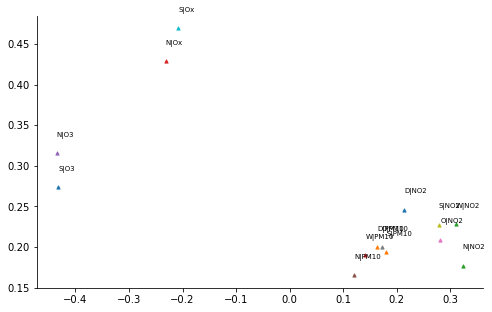

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
for i,j in enumerate(pcaF_comp.index):
    ax.scatter(pcaF_comp.PC1[i], pcaF_comp.PC2[i], marker = '^', s=10)
    ax.text(s=j, x=pcaF_comp.PC1[i], y=pcaF_comp.PC2[i]+.02, fontsize=7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Text(0, 0.5, 'PC2')

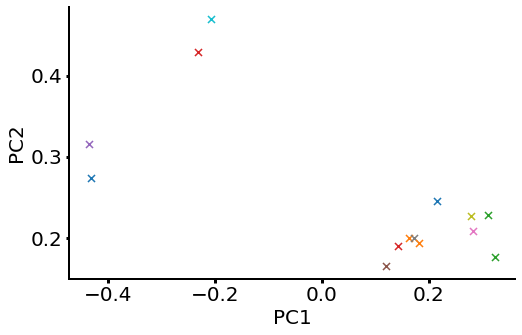

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
for i,j in enumerate(pcaF_comp.index):
    ax.scatter(pcaF_comp.PC1[i], pcaF_comp.PC2[i], marker = 'x', s=50)
    #ax.text(s=j[:-7], x=pcaF_comp.PC1[i], y=pcaF_comp.PC2[i]+.02, fontsize=10)
    plt.setp(ax.spines.values(), linewidth=2)
    ax.xaxis.set_tick_params(width=3)
    ax.yaxis.set_tick_params(width=3)
    ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('PC1', size=20)
ax.set_ylabel('PC2', size=20)

## save as tiff

In [15]:
from PIL import Image
from io import BytesIO

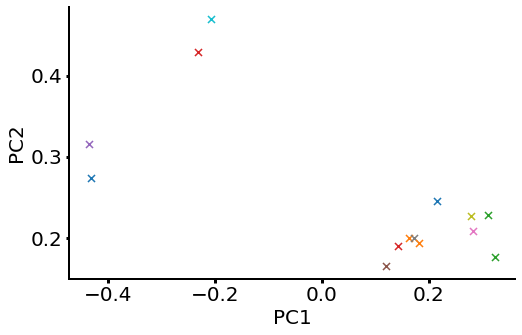

In [16]:
fig, ax = plt.subplots(figsize=(8,5))
for i,j in enumerate(pcaF_comp.index):
    ax.scatter(pcaF_comp.PC1[i], pcaF_comp.PC2[i], marker = 'x', s=50)
    #ax.text(s=j[:-7], x=pcaF_comp.PC1[i], y=pcaF_comp.PC2[i]+.02, fontsize=10)
    plt.setp(ax.spines.values(), linewidth=2)
    ax.xaxis.set_tick_params(width=3)
    ax.yaxis.set_tick_params(width=3)
    ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('PC1', size=20)
ax.set_ylabel('PC2', size=20)

png1 = BytesIO()
fig.savefig(png1, format='png')

png2 = Image.open(png1)

png2.save('3dPlot.tiff')
png1.close()

## see labels

In [17]:
pcaF_comp.index

Index(['D|NO2', 'D|PM10', 'N|NO2', 'N|Ox', 'N|O3', 'N|PM10', 'O|NO2', 'O|PM10',
       'S|NO2', 'S|Ox', 'S|O3', 'S|PM10', 'W|NO2', 'W|PM10'],
      dtype='object')

Text(0, 0.5, 'PC2')

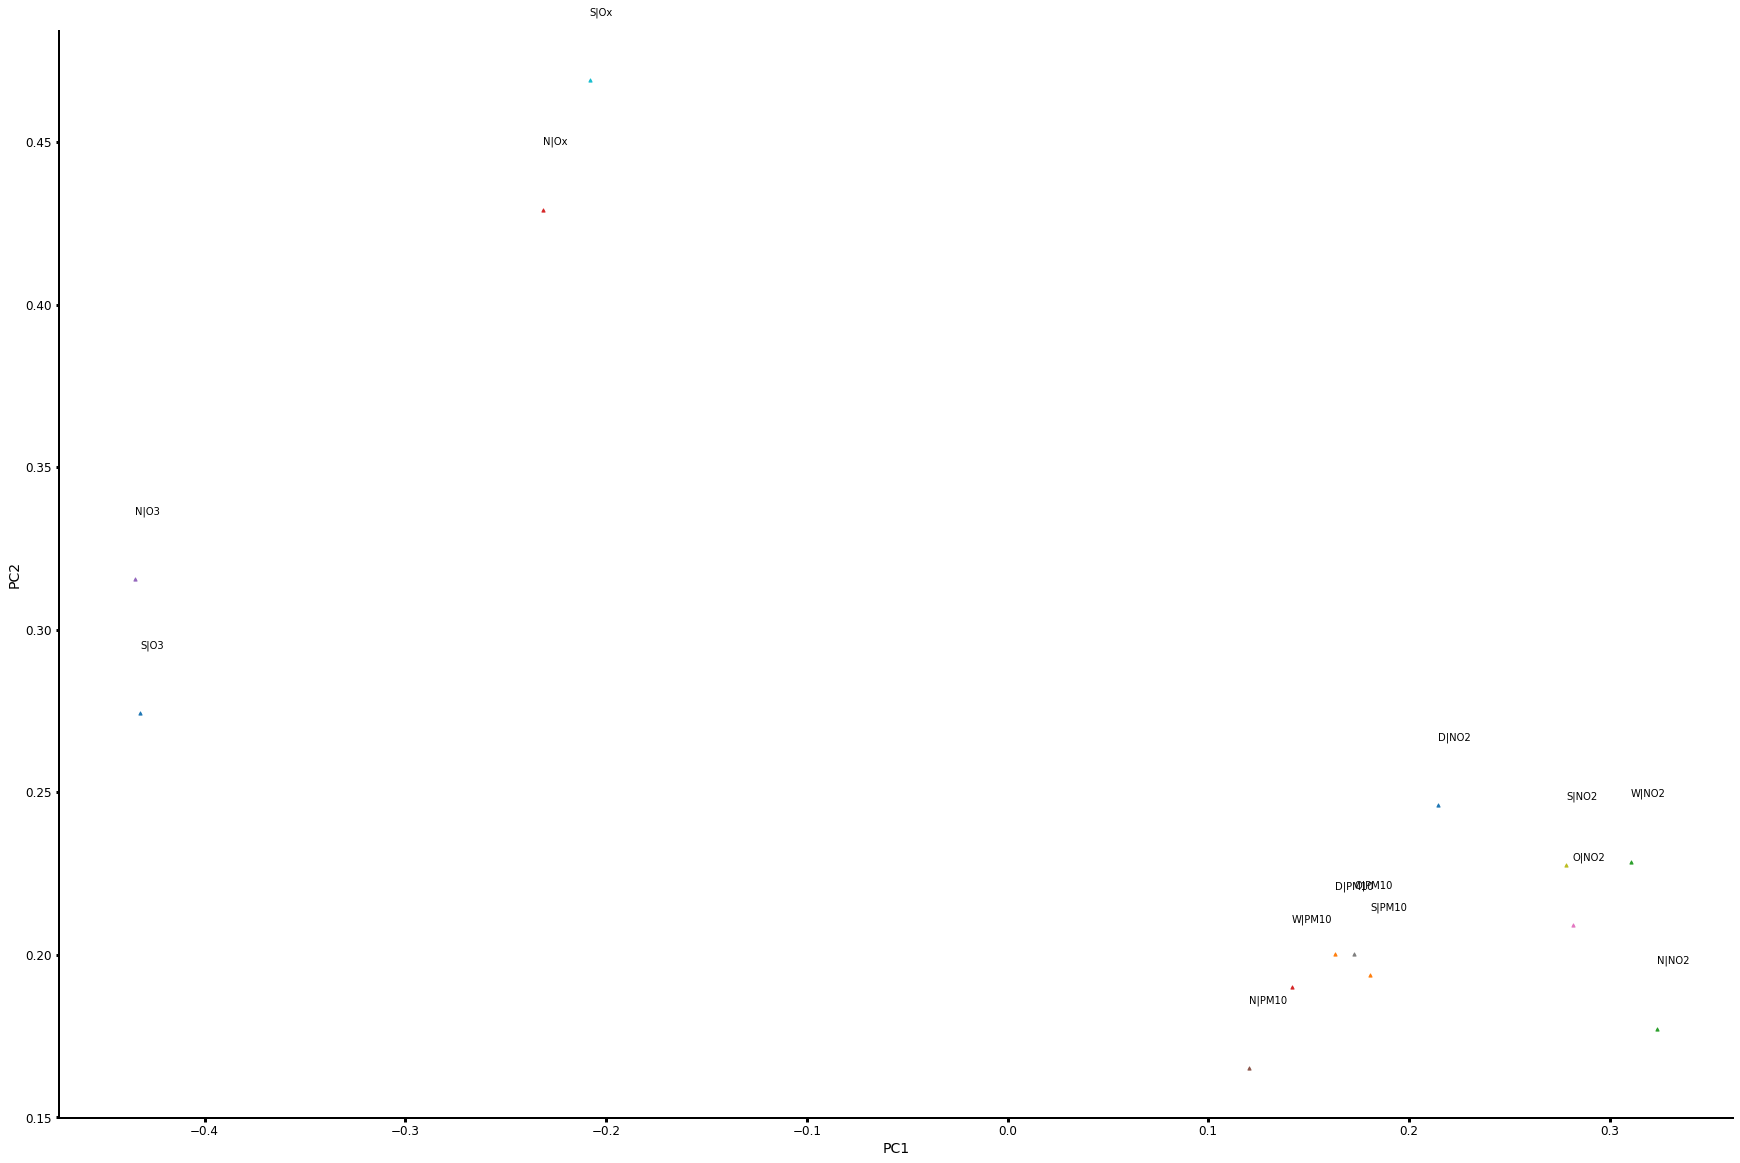

In [18]:
fig, ax = plt.subplots(figsize=(30,20))
for i,j in enumerate(pcaF_comp.index):
    ax.scatter(pcaF_comp.PC1[i], pcaF_comp.PC2[i], marker = '^', s=10)
    ax.text(s=j, x=pcaF_comp.PC1[i], y=pcaF_comp.PC2[i]+.02, fontsize=10)
    plt.setp(ax.spines.values(), linewidth=2)
    ax.xaxis.set_tick_params(width=3)
    ax.yaxis.set_tick_params(width=3)
    ax.tick_params(labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('PC1', size=14)
ax.set_ylabel('PC2', size=14)